# National Public Opinion Reference Survey (NPORS) Analysis

Jennifer Le  
12/6/24

The purpose of this analysis is to analyize public opinions on religion and the economy from 2020-2024 using data from NPORS surveys conducted anually since 2020.

Some questions this analysis will answer is 
1. How has public opinion on the economy changed since 2020
2. Add more questions here

[More information on NPORS surveys](https://www.pewresearch.org/methods/fact-sheet/national-public-opinion-reference-survey-npors/) 

## Import Datasets 

In [150]:
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from pandasql import sqldf


# Save each .sav as a data frame
df_20 = pd.read_spss("Datasets/NPORS-2020/dataset.sav")
df_21 = pd.read_spss("Datasets/NPORS-2021/dataset.sav")
df_22 = pd.read_spss("Datasets/NPORS-2022/dataset.sav")
df_23 = pd.read_spss("Datasets/NPORS-2023/dataset.sav")
df_24 = pd.read_spss("Datasets/NPORS-2024/dataset.sav")

# convert .sav to .csv
# df_20.to_csv("Datasets/NPORS-2020/dataset.csv", index=False)
# df_21.to_csv("Datasets/NPORS-2021/dataset.csv", index=False)
# df_22.to_csv("Datasets/NPORS-2022/dataset.csv", index=False)
# df_23.to_csv("Datasets/NPORS-2023/dataset.csv", index=False)
# df_24.to_csv("Datasets/NPORS-2024/dataset.csv", index=False)

# Print the number of rows and columns 
print("(number of rows, number of columns)")
print("2020 survey: ", df_20.shape)
print("2021 survey: ", df_21.shape)
print("2022 survey: ", df_22.shape)
print("2023 survey: ", df_23.shape)
print("2024 survey: ", df_24.shape)

def remove_year_from_column_name(dataset, stop):
    list_columns = list(dataset.columns)

    for i in range(0,len(list_columns)-stop):
        list_columns[i] = list_columns[i][:-5]

    dataset.columns = list_columns

remove_year_from_column_name(df_20, 5)
remove_year_from_column_name(df_21, 2)

# Test code works
# print(list(df_20.columns))
# print(list(df_21.columns))

(number of rows, number of columns)
2020 survey:  (4108, 61)
2021 survey:  (3937, 66)
2022 survey:  (4043, 72)
2023 survey:  (5733, 80)
2024 survey:  (5626, 59)


## Clean and Aggregate Data

In [125]:
# ensure columns recording the same data have the same name
df_20 = df_20.rename(columns={
    'SEXASK':'GENDER', 
    'NUMADULTS':'HH_ADULTS', 
    'EDUC_ACS':'EDUCATION', 
    'REGION_NAME':'REGION',
    'MSA':'METRO'
})

df_21 = df_21.rename(columns={
    'ADULTSINHH':'HH_ADULTS', 
    'BOOKS1':'BOOKS',
    'LANG':'LANGUAGE'
})

df_22 = df_22.rename(columns={
    'ADULTSINHH':'HH_ADULTS', 
    'BOOKS1':'BOOKS', 
    'CREGION':'REGION',
    'BBHOME':'HOMEINTSERV'
})

df_23 = df_23.rename(columns={
    'BASEWT':'BASEWEIGHT', 
    'ADULTS':'HH_ADULTS', 
    'BOOKS1':'BOOKS',
    'CREGION':'REGION',
    'INC_SDT1':'INCOME',
    'BBHOME':'HOMEINTSERV',
    'MODE_2WAY':'MODE'
})

df_24 = df_24.rename(columns={
    'BASEWT':'BASEWEIGHT', 
    'ADULTS':'HH_ADULTS', 
    'DEVICE1A':'DEVICE1a',
    'CREGION':'REGION',
    'INC_SDT1': 'INCOME'
})

# add year columns to all datasets
df_20['YEAR'] = 2020
df_21['YEAR'] = 2021
df_22['YEAR'] = 2022
df_23['YEAR'] = 2023
df_24['YEAR'] = 2024

# Combine (append) all datasets together
df_combined = pd.concat([df_20, df_21, df_22, df_23, df_24])
df_combined.to_csv("combined_dataset.csv", index=False)
print(df_combined.shape)

# remove irrelevant columns
df_combined = df_combined.drop(columns=[
    'AGE_REFUSED',
    'BOOKS1_REFUSED',
    'BORN',
    'BWAVE',
    'BIDENT1_GEOSTRATA',
    'BIRTHPLACE',
    'DATERECEIVED',
    'DEVICE_TYPE',
    'LANG_PREF',
    'LANGUAGE',
    'LANGUAGEINITIAL',
    'NATIVITY',
    'PARTYSUM',
    'PSTRATA',
    'RACEMOD_99',
    'RACEMOD_MIXEDOE',
    'RACETHN',
    'RACETHNMOD',
    'SURVEYENDDATE',
    'SURVEYSTARTDATE',
    'STRATUM'
], axis=1)

print(df_combined.shape)
print('all columns', sorted(list(df_combined.columns)))

# print columns common to datasets
common_columns = set(df_20) & set(df_21) & set(df_22) & set(df_23) 
print('common columns', len(common_columns), sorted(common_columns))


(23447, 106)
(23447, 85)
all columns ['AGE', 'AGECAT', 'ATTEND', 'ATTENDONLINE2', 'BASEWEIGHT', 'BOOKS', 'COLSPEECH', 'COMATTACH', 'COMTYPE2', 'COVIDWORK_a', 'COVIDWORK_b', 'CRIMESAFE', 'DEVICE1a', 'DISA', 'DISAMOD', 'DIVISION', 'ECON1BMOD', 'ECON1MOD', 'EDUCATION', 'EDUCCAT', 'EMINUSE', 'GAMBLERESTR', 'GENDER', 'GOVSIZE1', 'GUNSTRICT', 'HH_ADULTS', 'HISP', 'HLTHRATE', 'HOME4NW2', 'HOMEINTSERV', 'INCOME', 'INFRASPEND', 'INSURANCE', 'INTERVIEW_END', 'INTERVIEW_START', 'INTFREQ', 'INTFREQ_COLLAPSED', 'INTMOB', 'MARITAL', 'METRO', 'MODE', 'MOREGUNIMPACT', 'NHISLL', 'PARTY', 'PARTYLN', 'POLICE_FUND', 'PRAY', 'RACECMB', 'RACEMOD_1', 'RACEMOD_2', 'RACEMOD_3', 'RACEMOD_4', 'RACEMOD_5', 'RACEMOD_6', 'RADIO', 'REG', 'REGION', 'REGISTRATION', 'RELIG', 'RELIGCAT1', 'RELIMP', 'RESPFUT', 'RESPID', 'ROBWRK', 'SMART2', 'SMUSE_a', 'SMUSE_b', 'SMUSE_c', 'SMUSE_d', 'SMUSE_e', 'SMUSE_f', 'SMUSE_g', 'SMUSE_h', 'SMUSE_i', 'SMUSE_j', 'SMUSE_k', 'SOCTRUST', 'TYPOLOGYb', 'UNITY', 'VET1', 'VOL12_CPS', 'VOTED20

## Suvery Participant Demographics

In [ ]:
# examine distinct age values to see which are invalid
df_age = sqldf(
    """
    SELECT DISTINCT AGE
    FROM df_combined
    ORDER BY AGE ASC
    """
)
df_age.to_csv("result.csv",index=False)

# remove invalid values
df_age_clean = sqldf(
    """
    SELECT AGE
    FROM df_combined
    WHERE AGE NOT IN ('', 'Refused', '98+')
    ORDER BY AGE ASC
    """
)
df_age_clean.to_csv("result.csv",index=False)

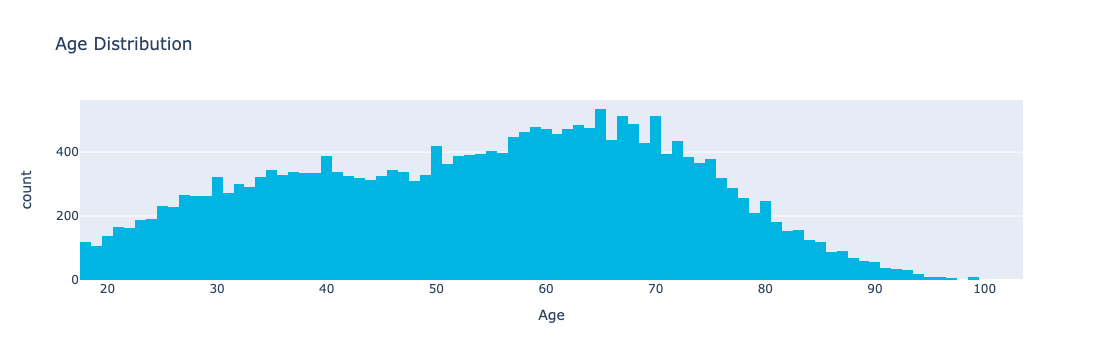

In [ ]:
fig = px.histogram(
    df_age_clean["AGE"].astype(float), 
    x = "AGE", 
    title = "Age Distribution",
    color_discrete_sequence=['#00b5e1']
)
fig.update_xaxes(title="Age").show()

In [ ]:
# look at distinct values from each RACEMOD 1-6 and HISP to determin what counts as a yes
df_race = sqldf(
    """
    SELECT DISTINCT RACEMOD_1
    FROM df_combined
    """
)
print(df_race)

# get count of each race
df_race_count = sqldf(
    """
    SELECT 
        Count(CASE WHEN RACEMOD_1 IN ('White', 'Yes', 'Selected') THEN 1 END) as White,
        Count(CASE WHEN RACEMOD_2 IN ('Black or African American', 'Yes', 'Selected') THEN 1 END) as Black,
        Count(CASE WHEN RACEMOD_3 IN ('Asian or Asian-American', 'Asian or Asian American', 'Yes', 'Selected') THEN 1 END) as Asian,
        Count(CASE WHEN RACEMOD_4 IN ('American Indian or Alaska Native', 'Yes', 'Selected') THEN 1 END) as 'American Indian or Alaska Native',
        Count(CASE WHEN RACEMOD_5 IN ('Native Hawaiian or other Pacific Islander', 'Yes', 'Selected') THEN 1 END) as 'Native Hawaiian or other Pacific Islander',
        Count(CASE WHEN HISP = 'Yes' THEN 1 END) as Hispanic,
        Count(CASE WHEN RACEMOD_6 IN ('Some other race or origin', 'Yes', 'Selected') THEN 1 END) as 'Other'
    FROM df_combined
    """
)
print(df_race_count)

   White  Black  Asian  American Indian or Alaska Native  \
0  17995   2830   1132                               584   

   Native Hawaiian or other Pacific Islander  Hispanic  Other  
0                                        142      3402   1130  


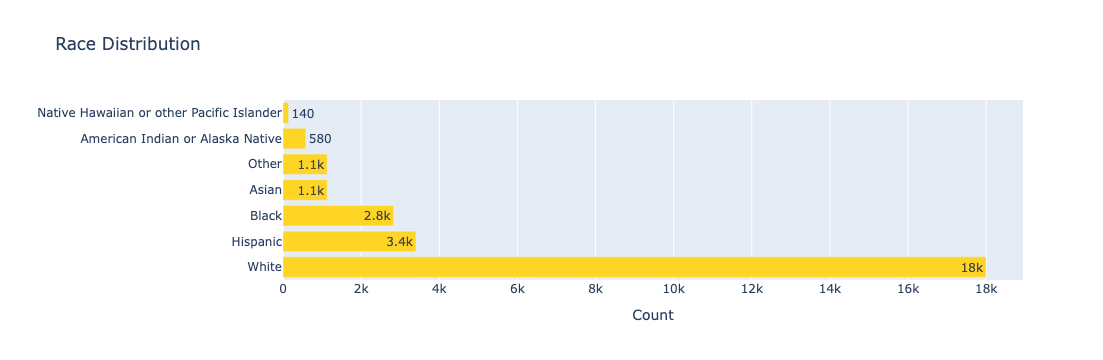

In [321]:
# convert columns to rows 
df_race_count_long = pd.melt(
    df_race_count,
    var_name='Race',
    value_name='Count'
)
df_race_count_long.to_csv("result.csv",index=False)

fig = px.bar(
    df_race_count_long, 
    y='Race', 
    x='Count',
    title='Race Distribution',
    text_auto='.2s', # put numbers in K format
    color_discrete_sequence=['#ffd525']
    
)
fig.update_yaxes(title="").update_layout(yaxis={'categoryorder':'total descending'}).show()

In [340]:
# examine distinct values of INCOME column
df_income_values = sqldf(
    """
    SELECT DISTINCT INCOME
    FROM df_combined
    ORDER BY INCOME ASC
    """
)
# print(df_income_values)

# get count of each income category
# can also use pandas values_count() to achieve this
df_income_distribution = sqldf(
    """
    SELECT INCOME as Income, COUNT(*) as Count
    FROM df_combined
    Where Income NOT IN (
        "Refused",
        "Don't know/Refused/Web blank"
    )
    GROUP BY Income
    """
)

# replace income values with easier-to-read values
df_income_distribution = df_income_distribution.replace({
    'Less than $10,000':'< $10K',
    '$10,000 to less than $20,000':'$10-20K',
    '$20,000 to less than $30,000':'$20-30K',
    'Less than $30,000':'< $30K',
    '$30,000 to less than $40,000':'$30-40K',
    '$40,000 to less than $50,000':'$40-50K',
    '$50,000 to less than $60,000':'$50-60K',
    '$50,000 to less than $75,000': '$50-75K',
    '$60,000 to less than $70,000':'$60-70K',
    '$70,000 to less than $80,000':'$70-80K',
    '$70,000 to less than $90,000':'$70-90K',
    '$75,000 to less than $100,000':'$75-100K',
    '$80,000 to less than $90,000':'$80-90K',
    '$90,000 to less than $100,000':'$90-100K',
    '$100,000 or more':'> $100K',
    '$100,000 to less than $150,000':'$100-150K',
    '$150,000 or more':'> $150K'
})


fig = px.bar(
    df_income_distribution, 
    y='Income', 
    x='Count', 
    text='Count',
    title="Income Distribution",
    color_discrete_sequence=['#b088f9'],
    category_orders={'Income':[
        '< $10K',
        '$10-20K',
        '$20-30K',
        '< $30K',
        '$30-40K',
        '$40-50K',
        '$50-60K',
        '$50-75K',
        '$60-70K',
        '$70-80K',
        '$70-90K',
        '$80-90K',
        '$75-100K',
        '$90-100K',
        '> $100K',
        '$100-150K',
        '> $150K'
    ]}
)
fig.show()


In [406]:
# examine distinct values of Education column
df_values = sqldf(
    """
    SELECT DISTINCT Education
    FROM df_combined
    ORDER BY Education
    """
)
# print(df_values)

df_education = sqldf(
    """
    SELECT EDUCATION, Count(*) as Count
    FROM df_combined
    WHERE EDUCATION NOT IN (
        "Refused",
        "Don't know/Refused/Web blank"
    )
    GROUP BY EDUCATION
    ORDER BY EDUCATION ASC
    """
)

df_education = df_education.replace({
    "Associate degree (such as AA, AS)":"Associate's Degree",
    "Associate's degree (such as AA, AS)":"Associate's Degree",
    "Associate’s degree (such as AA, AS)":"Associate's Degree",
    "Associate’s degree":"Associate's Degree",
    "Associate’s degree (for example: AA, AS)":"Associate's Degree",
    "Bachelor's degree (such as BA, BS)":"Bachelor's Degree",
    "Bachelor’s degree":"Bachelor's Degree",
    "Bachelor’s degree (for example: BA, BS)":"Bachelor's Degree",
    "Bachelor’s degree (such as BA, BS)":"Bachelor's Degree",
    "Doctorate degree (for example: PhD, EdD)":"Doctorate Degree",
    "Master’s degree (for example: MA, MS, MEng, MEd, MSW, MBA)":"Master's Degree",
    "Master’s degree or higher":"Master's degree or higher",
    "Grade 1 through 11":"Grade 11",
    "Kindergarten through grade 11":"Grade 11",
    "GED or alternative credential":"High School or GED",
    "Regular high school diploma":"High School or GED",
    "Regular high school diploma or GED":"High School or GED",
    "Kindergarten through grade 12":"Grade 12",
    "Professional degree beyond a bachelor’s degree (for example: MD, DDS, DVM, LLB, JD)":"Bachelor's Degree or Higher",
    "Some college credit but no degree":"Some college",
    "Some college credit, but less than 1 year of college credit":"Some college",
    "1 or more years of college credit, no degree":"Some college",
    "12th Grade – NO DIPLOMA": "Grade 12"
})

df_education = sqldf(
    """
    SELECT EDUCATION as Education, SUM(Count) as Total
    FROM df_education
    GROUP BY EDUCATION
    ORDER BY EDUCATION ASC
    """
)
df_education.to_csv("result2.csv",index=False)

fig = px.bar(
    df_education,
    y = 'Education',
    x = 'Total',
    title = 'Education Distribution',
    category_orders={'Education':[
        'No schooling completed',
        'Kindergarten',
        'Grade 11',
        'Grade 12',
        'High School or GED',
        "Some college",
        "Associate's Degree",
        "Bachelor's Degree",
        "Bachelor's Degree or Higher",
        "Master's Degree",
        "Master's degree or higher",
        "Doctorate Degree"
    ]}
)
fig.show()
"""
Some college,4945
"""


'\nSome college,4945\n'

## Examining Change in Opinions

In [372]:
def examine_changes(column, new_column_name, category_order):
    # examine distinct values of ECON1BMOD
    df_distinct_values = sqldf(
        """
        SELECT DISTINCT ECON1MOD
        FROM df_combined
        """
    )
    # print(df_distinct_values)

    # get count of each economy 
    df_change = sqldf(
        f"""
        SELECT 
            YEAR as Year, 
            {column} as `{new_column_name}`, 
            COUNT(*) as Count
        FROM df_combined
        Where `{new_column_name}` NOT IN ("Refused", "Don't know/Refused/Web blank")
        GROUP BY Year, `{new_column_name}`
        """
    )
    df_change = df_change.replace('Only Fair','Only fair')
    df_change['Percent'] = (df_change['Count'] / df_change.groupby('Year')['Count'].transform('sum')) * 100
    df_change.to_csv("result.csv",index=False)

    fig = px.histogram(
        df_change,
        x='Year',
        y='Percent',
        color=new_column_name,
        barmode='group',
        title=f'Opinions on {new_column_name} 2020-2024',
        hover_data=['Count'],
        category_orders={new_column_name:category_order}
    )
    fig.show()

examine_changes('ECON1MOD','Economic Conditions',[])


In [369]:
examine_changes('ECON1BMOD', 'Economic Conditions in 1 Year',['Better','About the same','Worse'])
